In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
data = pd.read_excel('allprices.xlsx')


In [3]:
data.head()

,Date,Aframax-TCE,Brent Oil Price,Industrial Production,Global Oil production (M bpd),Inflation,GDP,Crude oil Price WTI,Baltic Dirty Tanker Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2008-05-01,42703,110.50,100.3238,86.52,2.26,34935.525635,112.52,1993.0,NaN,NaN,NaN,NaN,NaN
1,2008-05-02,46632,114.56,100.3238,86.52,2.36,34935.525635,116.32,1902.0,NaN,NaN,NaN,NaN,NaN
2,2008-05-06,41785,117.99,100.3238,86.52,2.35,34935.525635,119.97,1965.0,NaN,NaN,NaN,NaN,Thousand barrels per day (MBPD) is equal to 10...
3,2008-05-07,44271,120.31,100.3238,86.52,2.38,34935.525635,121.84,1458.0,NaN,NaN,NaN,NaN,NaN
4,2008-05-08,52069,122.32,100.3238,86.52,2.36,34935.525635,123.53,1538.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data =data.drop(data.iloc[:,lambda data:[9,10,11,12,13]],axis=1)


In [5]:
df_Aframax = data.iloc[:,0:2]
df_Aframax

,Date,Aframax-TCE
0,2008-05-01,42703
1,2008-05-02,46632
2,2008-05-06,41785
3,2008-05-07,44271
4,2008-05-08,52069
...,...,...
2784,2019-06-26,9747
2785,2019-06-27,9326
2786,2019-06-28,8946
2787,2019-07-01,8997


In [6]:
df_Aframax=df_Aframax.set_index('Date')

In [7]:
df_Aframax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2789 entries, 2008-05-01 to 2019-07-02
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Aframax-TCE  2789 non-null   int64
dtypes: int64(1)
memory usage: 43.6 KB


In [8]:
df_Aframax.isnull().sum()

Aframax-TCE    0
dtype: int64

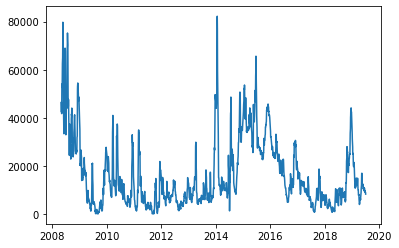

In [9]:
plt.plot(df_Aframax)

In [10]:
data = df_Aframax.values
data

array([[42703],
       [46632],
       [41785],
       ...,
       [ 8946],
       [ 8997],
       [ 8353]], dtype=int64)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0 ,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.51851536],
       [0.56637513],
       [0.50733306],
       ...,
       [0.107316  ],
       [0.10793724],
       [0.10009258]])

In [13]:
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[0:train_size,:]
train_data.shape


(2231, 1)

In [14]:
# creating data structure with 60 timesteps
#X_train = []
#Y_train = []
#for i in range(60, len(training_set_scaled)):
#    X_train.append(training_set_scaled[i-60:i, 0])
#    Y_train.append(training_set_scaled[i, 0])
#X_train, Y_train = np.array(X_train), np.array(Y_train)

#n_future = 10
#n_past = 60

def create_dataset(n_past,X):
    Xs,ys=[],[]
    for i in range(n_past,len(X)):
        Xs.append(X[i-n_past:i,0])
        ys.append(X[i,0])
    return np.array(Xs),np.array(ys)









In [15]:
X_train,y_train=create_dataset(60,train_data)


In [17]:
# Reshaping
#X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
#X_train.shape,y_train.shape # random batch size of 60 sequences having 2171 observations with 1 input and 1 output

In [16]:
#The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

#Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))



In [17]:
y_train.shape[0]

2171

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2)) #  randomly sets elements to zero to prevent overfitting.

In [20]:
model.add(LSTM(units = 50,activation='relu', return_sequences = False))
model.add(Dropout(0.2))

In [21]:
model.add(Dense(25))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(1)) # Dense is used for classification . It is the last layer with output=1

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
68/68 [==============================] - 6s 53ms/step - loss: 0.0169
Epoch 2/20
68/68 [==============================] - 4s 64ms/step - loss: 0.0062
Epoch 3/20
68/68 [==============================] - 5s 68ms/step - loss: 0.0046
Epoch 4/20
68/68 [==============================] - 4s 61ms/step - loss: 0.0039
Epoch 5/20
68/68 [==============================] - 4s 58ms/step - loss: 0.0041
Epoch 6/20
68/68 [==============================] - 4s 61ms/step - loss: 0.0034
Epoch 7/20
68/68 [==============================] - 4s 55ms/step - loss: 0.0032
Epoch 8/20
68/68 [==============================] - 4s 56ms/step - loss: 0.0031
Epoch 9/20
68/68 [==============================] - 4s 59ms/step - loss: 0.0030
Epoch 10/20
68/68 [==============================] - 4s 64ms/step - loss: 0.0025
Epoch 11/20
68/68 [==============================] - 4s 59ms/step - loss: 0.0025
Epoch 12/20
68/68 [==============================] - 4s 53ms/step - loss: 0.0024
Epoch 13/20
68/68 [==================

In [25]:
test_data = scaled_data[train_size-60:,:]
test_data.shape


(618, 1)

In [26]:
Y_test = data[train_size:,:]
Y_test.shape


(558, 1)

In [27]:

X_test = []
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [28]:
X_test=np.array(X_test)

In [29]:
X_test.shape

(558, 60)

In [30]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [31]:
predicted_model = model.predict(X_test)
predicted_model = scaler.inverse_transform(predicted_model) # outscaled the data

In [32]:
print(predicted_model)

[[ 9791.826 ]
 [ 9655.64  ]
 [ 9798.687 ]
 [ 9887.149 ]
 [ 9726.777 ]
 [ 9705.096 ]
 [ 9753.104 ]
 [10253.45  ]
 [10759.1   ]
 [11042.86  ]
 [11055.011 ]
 [10976.162 ]
 [10745.148 ]
 [10414.294 ]
 [ 9719.13  ]
 [ 9387.4   ]
 [ 9015.373 ]
 [ 8645.572 ]
 [ 8676.933 ]
 [ 9256.715 ]
 [ 9961.437 ]
 [10466.705 ]
 [10502.899 ]
 [ 9805.629 ]
 [ 8974.485 ]
 [ 8400.531 ]
 [ 7941.037 ]
 [ 8190.8735]
 [ 9150.12  ]
 [10958.882 ]
 [12830.465 ]
 [15346.583 ]
 [16710.021 ]
 [15805.631 ]
 [14049.253 ]
 [12151.156 ]
 [10548.436 ]
 [ 9319.106 ]
 [ 8247.962 ]
 [ 7438.7812]
 [ 6777.2256]
 [ 6367.0845]
 [ 6182.9717]
 [ 6194.618 ]
 [ 6230.5464]
 [ 6375.08  ]
 [ 6785.787 ]
 [ 7313.7812]
 [ 7650.8794]
 [ 7689.219 ]
 [ 7475.126 ]
 [ 7241.956 ]
 [ 7088.143 ]
 [ 6967.618 ]
 [ 6824.9624]
 [ 6472.2705]
 [ 6034.6064]
 [ 5622.7017]
 [ 5215.1196]
 [ 4839.714 ]
 [ 4496.828 ]
 [ 4282.223 ]
 [ 4128.682 ]
 [ 4054.8337]
 [ 4122.7437]
 [ 4270.454 ]
 [ 4402.657 ]
 [ 4432.311 ]
 [ 4446.4976]
 [ 4551.425 ]
 [ 4631.3535]
 [ 478

In [33]:
rmse = np.sqrt(np.mean(predicted_model-Y_test)**2)
rmse

495.947756968946

In [39]:
train=df_Aframax[:train_size]
valid = df_Aframax[train_size:]
#valid['Predictions'] = predicted_model
valid['Predictions'] = predicted_model
valid

C:\Users\User\AppData\Local\Temp/ipykernel_888/4202116844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_model


,Aframax-TCE,Predictions
Date,,
2017-04-06,9556,9791.826172
2017-04-07,9809,9655.639648
2017-04-10,9566,9798.686523
2017-04-11,9149,9887.149414
2017-04-12,9517,9726.777344
...,...,...
2019-06-26,9747,9416.256836
2019-06-27,9326,9705.398438
2019-06-28,8946,9763.968750


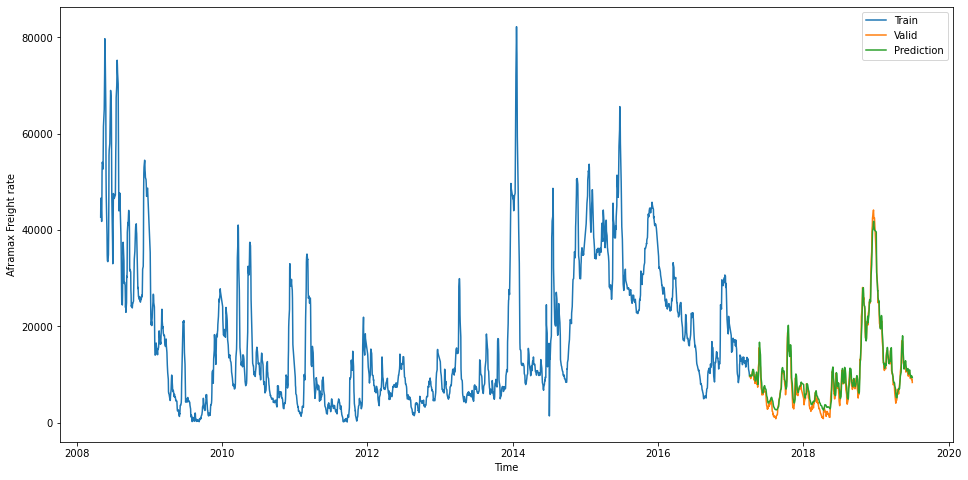

In [45]:
plt.figure(figsize=(16,8))
plt.plot(train, label = 'Real Aframax Price')
plt.plot(valid[['Aframax-TCE','Predictions']])
plt.xlabel('Time')
plt.ylabel('Aframax Freight rate')
plt.legend(['Train','Valid','Prediction'])
plt.show()